<a href="https://colab.research.google.com/github/jolynt24/QRS/blob/main/MovieLens_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MovieLens Exploration

##1. Install the plug-ins

Run the cell below

In [ ]:
!pip install -q kaggle
from google.colab import drive
drive.mount('/gdrive')
!mkdir ~/.kaggle
!cp /gdrive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download grouplens/movielens-latest-small -p /content/sample_data/ --unzip 

Mounted at /gdrive
  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 52.7MB/s]


##2. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


##3. Obtain the data

In [ ]:
ratings = pd.read_csv('/content/sample_data/ratings.csv',parse_dates=['timestamp'])
movies = pd.read_csv('/content/sample_data/movies.csv')

##4. Explore the ratings and movies dataset

In [ ]:
print("Ratings:",ratings.shape)
print("Movie:",movies.shape)

Ratings: (100836, 4)
Movie: (9742, 3)


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:
genreList = [movie.split('|') for movie in list(movies['genres'].unique())]
genres = list({genre for gList in genreList for genre in gList})
print(genres)

['Mystery', 'Film-Noir', 'War', 'Crime', 'Drama', 'Documentary', 'IMAX', 'Fantasy', 'Adventure', '(no genres listed)', 'Romance', 'Animation', 'Children', 'Action', 'Horror', 'Comedy', 'Western', 'Musical', 'Sci-Fi', 'Thriller']


Average rating for each genre

{'Mystery': 3.632460255407871, 'Film-Noir': 3.920114942528736, 'War': 3.8082938876312, 'Crime': 3.658293867274144, 'Drama': 3.6561844113718758, 'Documentary': 3.797785069729286, 'IMAX': 3.618335343787696, 'Fantasy': 3.4910005070136894, 'Adventure': 3.5086089151939075, '(no genres listed)': 3.4893617021276597, 'Romance': 3.5065107040388437, 'Animation': 3.6299370349170004, 'Children': 3.412956125108601, 'Action': 3.447984331646809, 'Horror': 3.258195034974626, 'Comedy': 3.3847207640898267, 'Western': 3.583937823834197, 'Musical': 3.5636781053649105, 'Sci-Fi': 3.455721162210752, 'Thriller': 3.4937055799183425}


Text(0, 0.5, 'Rating')

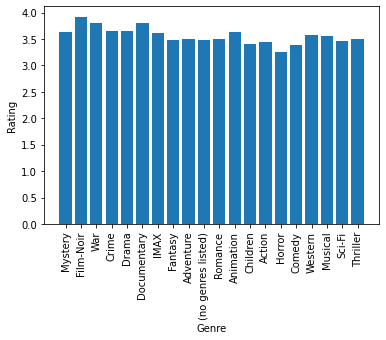

In [ ]:
"""
For each genre
Get the movieIds
Get the total of the ratings of the movieIds
Divide by the total movieIds for the average
"""
avgGRating = {}
mostRatedG = {}
mPerG = {}

for genre in genres:
  movieIds = []
  for movie in movies.itertuples():
    if genre in movie.genres: movieIds.append(movie.movieId)
  rList = ratings[ratings['movieId'].isin(movieIds)].rating
  mostRatedG[genre] = len(rList)
  avgGRating[genre] = sum(rList)/len(rList)
  mPerG[genre] = len(movieIds)

print(avgGRating)

plt.bar(avgGRating.keys(),avgGRating.values())
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Rating")

Most rated genre

Text(0, 0.5, 'User Count')

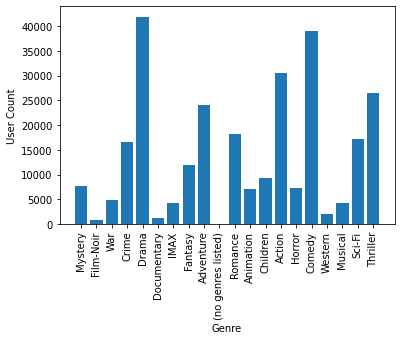

In [ ]:
"""
For each genre
Obtain the movieIds
Get the rows from the ratings using them
(from above)
Get the length to find the most rated genres
"""

plt.bar(mostRatedG.keys(),mostRatedG.values())
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("User Count")

Total movies per genre

Text(0, 0.5, 'Movie Count')

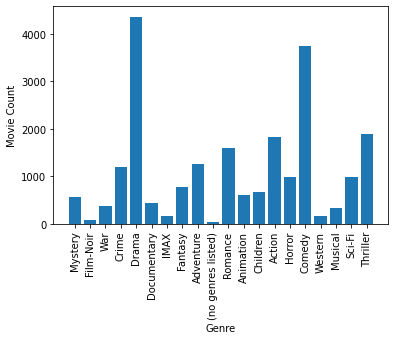

In [ ]:
"""
Obtain the genre
For each genre,
Obtain the row in the movies
Calculate the length of the row
"""
plt.bar(mPerG.keys(),mPerG.values())
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Movie Count")

Highest rated movies

Text(0, 0.5, 'User Count')

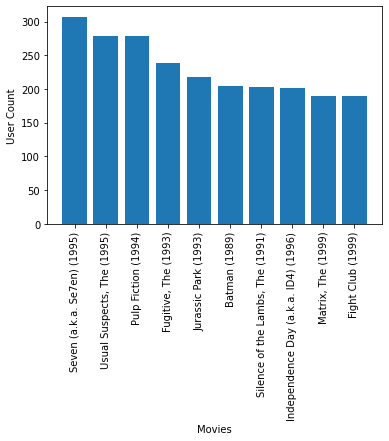

In [ ]:
"""
Get all the movieIds
For each movieId,
count the total number of ratings given to movieId
arrange according to descending order
get the top 10 movies
"""

highRatedM = {}

moviesIds = movies['movieId'].unique()
for movieId in movieIds:
  mList = ratings[ratings['movieId']== movieId].rating
  highRatedM[movieId] = len(mList)

highRatedM = sorted(highRatedM.items(), key=lambda val: val[1], reverse=True)[:10]

movie,rat = [], []
for m,r in highRatedM:
  movie.append(m)
  rat.append(r)

plt.bar(movies[movies['movieId'].isin(movie)].title,rat)
plt.xticks(rotation=90)
plt.xlabel("Movies")
plt.ylabel("User Count")

Users with the most rating

['414', '599', '474', '448', '274', '610', '68', '380', '606', '288']
[2698, 2478, 2108, 1864, 1346, 1302, 1260, 1218, 1115, 1055]


Text(0, 0.5, 'Total ratings given by the user')

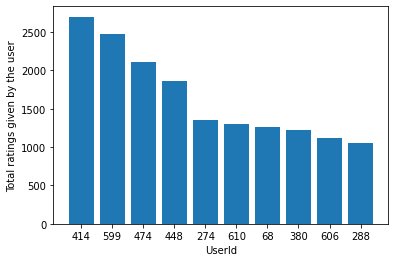

In [ ]:
"""
Get all the userIds
Get the len of the userIds in ratings
Obtain the top 10 users
"""

highRatedU = {}

userIds = ratings['userId'].unique()
for userId in userIds:
  uList = ratings[ratings['userId']== userId].rating
  highRatedU[userId] = len(uList)

highRatedU = sorted(highRatedU.items(), key=lambda val: val[1], reverse=True)[:10]

user,cnt = [], []
for u,c in highRatedU:
  user.append(str(u))
  cnt.append(c)
print(user)
print(cnt)

plt.bar(user,cnt)
plt.xlabel("UserId")
plt.ylabel("Total ratings given by the user")

Total users per rating

Text(0, 0.5, 'User Count')

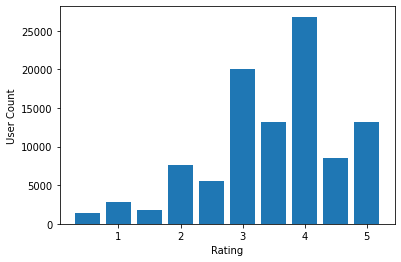

In [ ]:
"""
Get all the rating values
For each rating,
Calculate the total number of users
"""
rCount = {}
mrCount = {}

mRatings = ratings['rating'].unique()
for r in mRatings:
  rList = ratings[ratings['rating']==r]
  mrList = rList.movieId.unique()
  rCount[r] = len(rList)
  mrCount[r] = len(mrList)

plt.bar(rCount.keys(),rCount.values(),width=0.4)
plt.xlabel("Rating")
plt.ylabel("User Count")

Total movies per rating

Text(0, 0.5, 'Movie Count')

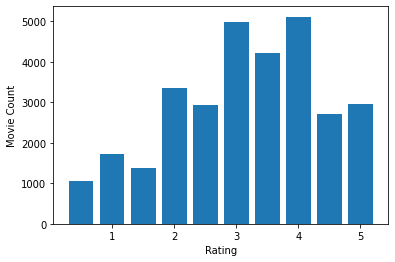

In [ ]:
"""
Get all the ratings
For each rating,
Count the movieIds
(done in the previous step)
"""
plt.bar(mrCount.keys(),mrCount.values(),width=0.4)
plt.xlabel("Rating")
plt.ylabel("Movie Count")